## Chapter 3 A Tour of Machine Learning Classifier Using Scikit-Learn

Each classification algorithm has its tradeoff, no ML free lunch.

No single classifier works for all situations.

You must experiment and see which classifier works best for your project, although there is a mountain of data out there to point you in the right direction to shortcut much of this.

The power of a classifier depends on the data available for learning.

* Training
  * Selecting features and collecting labeled training examples
  * Choose a performance metric
  * Choose a learning algorithm and training a model
  * Evaluation the performance of a model
  * Changing the settings and tuning the model

Page 54

Scikit gives us an API to easily leverage models like preceptron and Adaline for testing. It also includes many functions and convenience features. 

Lets training some more perceptron models with the Iris Dataset

In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris() # datasets contains a number of sample datasets from sklearn
X = iris.data[:, [2, 3]] # : means all rows, [2, 3] means columns 2 and 3 of the iris data
y = iris.target # target is the class labels
# X is the features or data, y is the class labels or target

# Print the class labels, deduplicated
print('Class labels:', np.unique(y)) # We use numpy's unique method to deduplicate the iris targets in y

Class labels: [0 1 2]


It is best practice to utilizer numerical values for class labels to avoid technical issues and increase training/testing speed.

Lets split the dataset into a train and test dataset. Scikit Learn has a function for this we can import. We want to randomly split the X and y arrays into 30% test data and 70% training data.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
# stratify=y means that the class labels are distributed in the training and test sets as they are in the original dataset

print('Labels counts in y:', np.bincount(y))
print('Lanels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))



Labels counts in y: [50 50 50]
Lanels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [5]:
# Implementing standardization/scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train) # fit method estimates the sample mean and standard deviation for each feature dimension
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# Now we have estimated the params for standardization we can now train the perceptron model
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [7]:
# Lets make predictions
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (y_test != y_pred).sum())


Misclassified examples: 1


Scikit-learn has a number of metrics that are collected.

In [8]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.978


In [9]:
# We can also use the score method of the Perceptron object to calculate the accuracy
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978


Overfitting

Overfitting occurs when a model learns not only the general patterns in the training data but also noise or irrelevant details, resulting in high accuracy on the training set but poor performance on unseen or test data. This indicates that the model has failed to generalize well beyond the training data.

* Overfitting involves learning patterns that are too specific to the training data, including noise or outliers.
* The model's performance will typically be excellent on the training set but significantly worse on validation or test sets.
* Overfitting can occur when the model is too complex (e.g., too many parameters) relative to the amount or quality of the data.

Use plot_decision_regions function to plot the decision regions of the trained perceptron model

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # X is the feature or data
    # y is the class labels or target
    # classifier is the model
    # test_idx is the test set
    # resolution is the resolution of the grid
    markers = ('o', 's', '^', 'v' '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision curve
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=[cmap(idx)], marker=markers[idx], label=cl)
    
    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ''

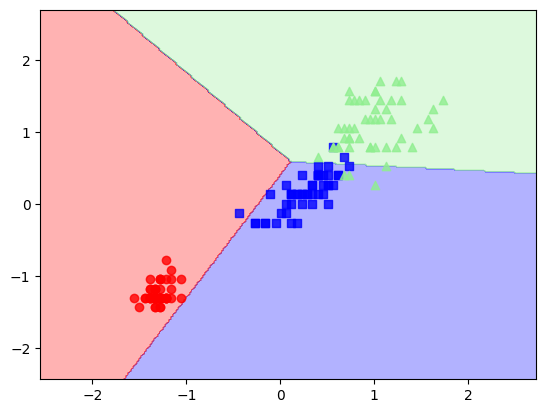

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()